# SENTIMENT ANALYSIS OF AMAZON PRODUCT REVIEWS FOR CONSUMER INSIGHTS


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from transformers import BertTokenizer
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('common_words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading common_words: Package 'common_words' not
[nltk_data]     found in index


False

# Data Preprocessing

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv('Amazon_Reviews.csv')

# Display the first few rows of the dataset
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
# Display summary information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

# Explanatory Data Analysis (EDA)

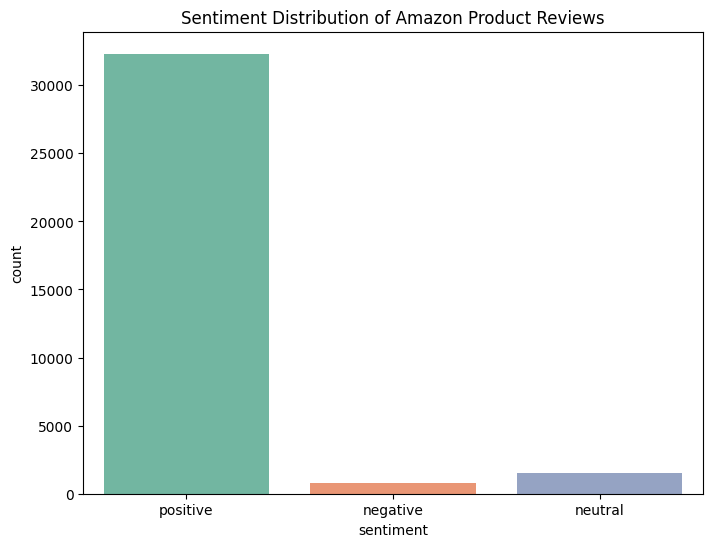

In [4]:

# Handle missing values and drop rows with missing reviews or ratings
df = df.dropna(subset=['reviews.text', 'reviews.rating'])

# Map ratings to sentiment labels (negative, neutral, positive)
df['sentiment'] = df['reviews.rating'].apply(lambda x: 'negative' if x <= 2 else 'neutral' if x == 3 else 'positive')

# Display sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution of Amazon Product Reviews')
plt.show()


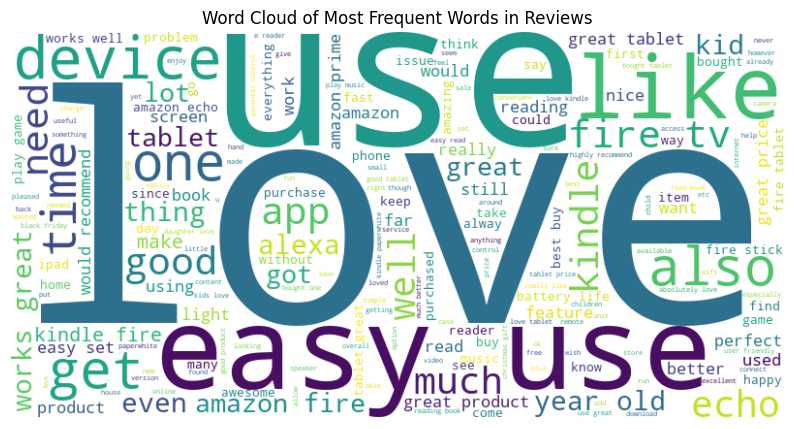

In [5]:
# Clean and preprocess the review text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply text preprocessing
df['cleaned_reviews'] = df['reviews.text'].apply(preprocess_text)

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['processed_reviews'] = df['cleaned_reviews'].apply(tokenize_and_remove_stopwords)

# Word Cloud for most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(' '.join(df['processed_reviews']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words in Reviews')
plt.axis('off')
plt.show()


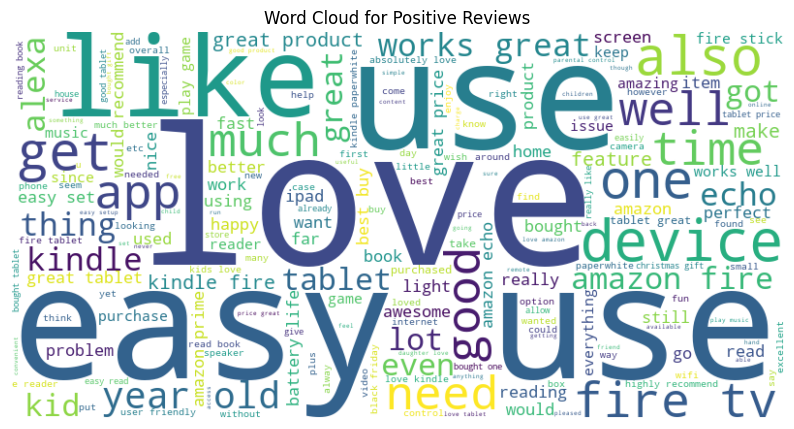

In [6]:
# Sentiment-Specific Word Cloud (Positive, Negative, Neutral)
# Positive Reviews
positive_reviews = df[df['sentiment'] == 'positive']
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(' '.join(positive_reviews['processed_reviews']))

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


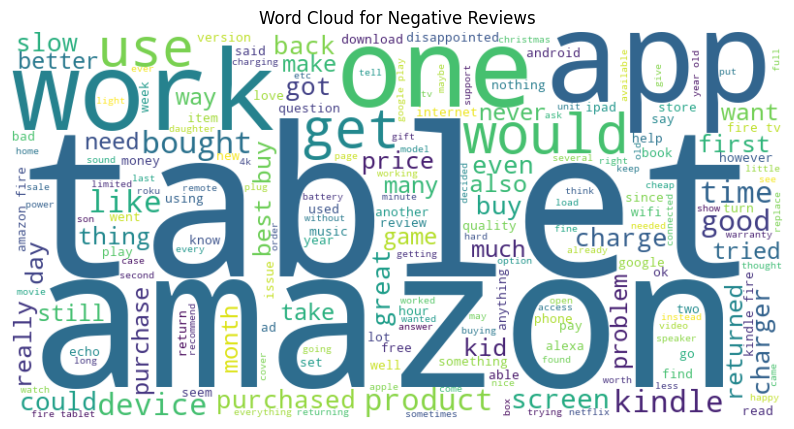

In [7]:
# Negative Reviews
negative_reviews = df[df['sentiment'] == 'negative']
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(' '.join(negative_reviews['processed_reviews']))

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


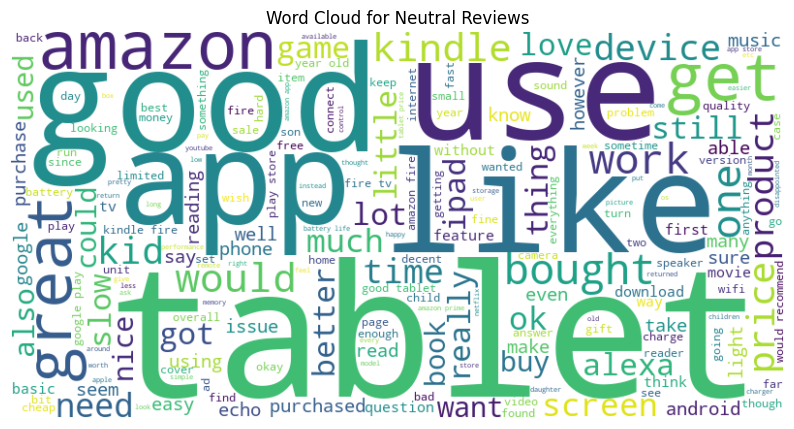

In [8]:
# Neutral Reviews
neutral_reviews = df[df['sentiment'] == 'neutral']
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(' '.join(neutral_reviews['processed_reviews']))

plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')
plt.show()

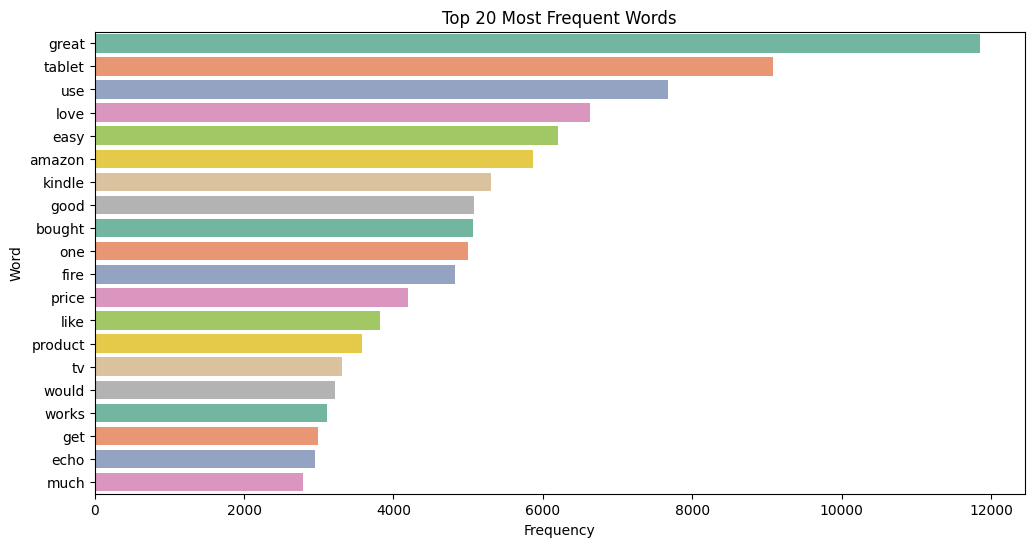

In [9]:
# Frequency Distribution of words
from nltk.probability import FreqDist

all_words = ' '.join(df['processed_reviews']).split()
fdist = FreqDist(all_words)

# Display top 20 most frequent words
top_words = fdist.most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='Set2')
plt.title('Top 20 Most Frequent Words')
plt.show()

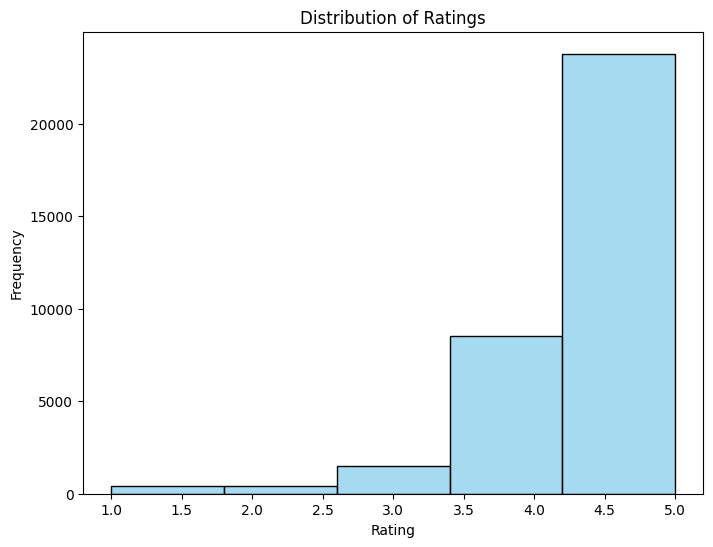

In [10]:
# EDA: Histogram for Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['reviews.rating'], kde=False, bins=5, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

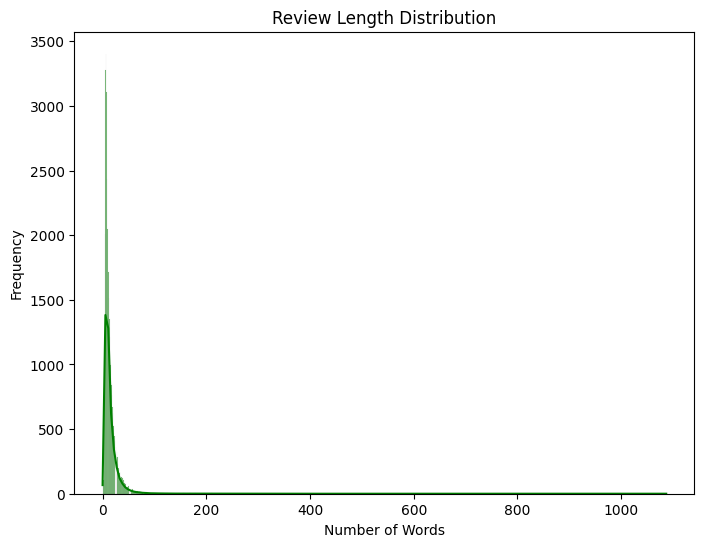

In [11]:
# EDA: Review Length Distribution (number of words)
df['review_length'] = df['processed_reviews'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], kde=True, color='green')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()



# TfidfVectorizer for text vectorization

In [12]:
# Initialize TfidfVectorizer for text vectorization
vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer and transform the text data
X = vectorizer.fit_transform(df['processed_reviews']).toarray()

# Convert sentiment labels to numeric values (negative: 0, neutral: 1, positive: 2)
y = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values


# Split the data

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shape of train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (27700, 10000)
Test data shape: (6926, 10000)


# Model 1: Simple Feedforward Neural Network (Multilayer Perceptron, or MLP) for Sentiment Analysi

In [14]:
class SentimentNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SentimentNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Define the model, loss function, and optimizer
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 128  # Number of hidden units
output_dim = 3  # Three classes: negative, neutral, positive

model = SentimentNN(input_dim, hidden_dim, output_dim)

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [15]:

# Initialize lists to store loss values
train_losses = []

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Train the model
num_epochs = 10
batch_size = 64
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Assuming you use Adam optimizer
criterion = torch.nn.CrossEntropyLoss()  # Assuming a classification task

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0  # To track the total loss for the epoch
    for i in range(0, X_train_tensor.shape[0], batch_size):
        # Get the mini-batch
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_X)
        
        # Compute the loss
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()  # Accumulate loss for this epoch
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()

    # Append average epoch loss to the list
    avg_epoch_loss = epoch_loss / (X_train_tensor.shape[0] // batch_size)
    train_losses.append(avg_epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")




Epoch [1/10], Loss: 0.6738
Epoch [2/10], Loss: 0.6199
Epoch [3/10], Loss: 0.6197
Epoch [4/10], Loss: 0.6197
Epoch [5/10], Loss: 0.6196
Epoch [6/10], Loss: 0.6183
Epoch [7/10], Loss: 0.6135
Epoch [8/10], Loss: 0.6066
Epoch [9/10], Loss: 0.5993
Epoch [10/10], Loss: 0.5934


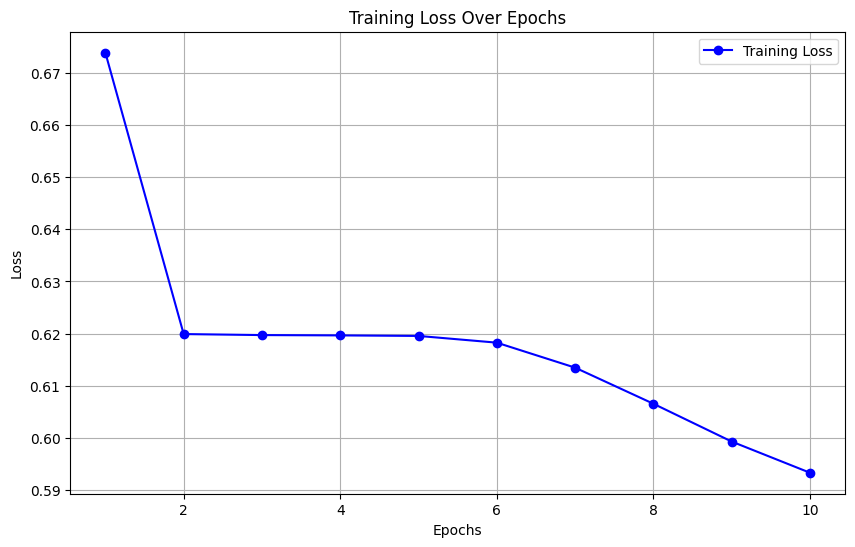

In [16]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', color='b', label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Evaluate on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())

print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test_tensor.cpu(), predicted.cpu(), target_names=['negative', 'neutral', 'positive']))


Test Accuracy: 0.9317
              precision    recall  f1-score   support

    negative       0.45      0.27      0.33       162
     neutral       0.30      0.11      0.16       300
    positive       0.95      0.99      0.97      6464

    accuracy                           0.93      6926
   macro avg       0.57      0.45      0.49      6926
weighted avg       0.91      0.93      0.92      6926



In [18]:
# Function to predict sentiment for a real review
def predict_sentiment(review, model, vectorizer):
    # Preprocess the review
    review = preprocess_text(review)
    review = tokenize_and_remove_stopwords(review)
    
    # Vectorize the review
    review_vector = vectorizer.transform([review]).toarray()
    
    # Convert the review vector to tensor
    review_tensor = torch.tensor(review_vector, dtype=torch.float32)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(review_tensor)
        _, predicted = torch.max(output, 1)
    
    return ['negative', 'neutral', 'positive'][predicted.item()]

# Test with a real review
real_review = "I absolutely love this product! It works great and exceeded my expectations."
sentiment = predict_sentiment(real_review, model, vectorizer)
print(f"Predicted sentiment for the review: {sentiment}")


Predicted sentiment for the review: positive


In [19]:
import gradio as gr

# Function to predict sentiment for a real review
def predict_sentiment(review, model, vectorizer):
    # Preprocess the review
    review = preprocess_text(review)
    review = tokenize_and_remove_stopwords(review)
    
    # Vectorize the review
    review_vector = vectorizer.transform([review]).toarray()
    
    # Convert the review vector to tensor
    review_tensor = torch.tensor(review_vector, dtype=torch.float32)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(review_tensor)
        _, predicted = torch.max(output, 1)
    
    return ['negative', 'neutral', 'positive'][predicted.item()]

# Create Gradio interface
def interface_fn(review):
    sentiment = predict_sentiment(review, model, vectorizer)
    return f"Predicted sentiment for the review: {sentiment}"

# Define the Gradio interface
iface = gr.Interface(
    fn=interface_fn, 
    inputs=gr.Textbox(label="Enter your review here"), 
    outputs=gr.Textbox(label="Predicted Sentiment"),
    title="Amazon Product Review Sentiment Analysis",
    description="Enter an Amazon product review and get the predicted sentiment (negative, neutral, or positive)."
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.26.0, however version 4.44.1 is available, please upgrade.
--------


# Model 2; LSTM (Long Short-Term Memory) for Sentimental Analysis

In [20]:

# Tokenize reviews again for LSTM input
tokenized_reviews = [nltk.word_tokenize(review) for review in df['processed_reviews']]

# Build a vocabulary and encode the reviews as sequences of integers
all_words = [word for review in tokenized_reviews for word in review]
vocab = list(set(all_words))
vocab_size = len(vocab)

word_to_idx = {word: idx + 1 for idx, word in enumerate(vocab)}  # Start indexing from 1
word_to_idx['<PAD>'] = 0  # Padding token

# Convert reviews to sequences of integers
def text_to_sequence(text, word_to_idx):
    return [word_to_idx.get(word, word_to_idx['<PAD>']) for word in text]

X_sequences = [text_to_sequence(review, word_to_idx) for review in tokenized_reviews]

# Pad the sequences to have uniform length (e.g., 100 words per review)
max_len = 100
X_padded = np.array([seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len] for seq in X_sequences])

# Convert labels to tensor
y = torch.tensor(df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values, dtype=torch.long)

# Split the data into train and test sets (matching the previous train-test split)
X_train_tensor, X_test_tensor = torch.tensor(X_padded[:len(X_train)], dtype=torch.long), torch.tensor(X_padded[len(X_train):], dtype=torch.long)
y_train_tensor, y_test_tensor = y[:len(X_train)], y[len(X_train):]

# Create DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [21]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout_prob):
        super(LSTMModel, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
  
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True, dropout=dropout_prob)
  
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        # We use the last hidden state as the representation for the entire sequence
        hidden = hidden[-1, :, :]
        out = self.fc(self.dropout(hidden))
        return out


In [22]:
# Model hyperparameters
embedding_dim = 100
hidden_dim = 128
output_dim = 3  # 3 classes: negative, neutral, positive
n_layers = 2
dropout_prob = 0.5

# Instantiate the model
model = LSTMModel(vocab_size=len(word_to_idx), embedding_dim=embedding_dim, hidden_dim=hidden_dim,
                  output_dim=output_dim, n_layers=n_layers, dropout_prob=dropout_prob)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    
    for batch in train_loader:
        # Get the batch data
        reviews, labels = batch
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(reviews)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update loss and accuracy metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch 1/5, Loss: 0.3137, Accuracy: 0.9291
Epoch 2/5, Loss: 0.3045, Accuracy: 0.9300
Epoch 3/5, Loss: 0.3031, Accuracy: 0.9302
Epoch 4/5, Loss: 0.3010, Accuracy: 0.9303
Epoch 5/5, Loss: 0.3012, Accuracy: 0.9305


In [23]:
# Evaluate the model on the test set
model.eval()
test_correct_preds = 0
test_total_preds = 0
test_running_loss = 0.0

with torch.no_grad():
    for batch in test_loader:
        reviews, labels = batch
        
        # Forward pass
        outputs = model(reviews)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()
        
        # Update accuracy metrics
        _, predicted = torch.max(outputs, 1)
        test_correct_preds += (predicted == labels).sum().item()
        test_total_preds += labels.size(0)

test_loss = test_running_loss / len(test_loader)
test_accuracy = test_correct_preds / test_total_preds
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.2654, Test Accuracy: 0.9454


In [24]:
# Display classification report
from sklearn.metrics import classification_report
y_pred = []
y_true = []

with torch.no_grad():
    for batch in test_loader:
        reviews, labels = batch
        outputs = model(reviews)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

print(classification_report(y_true, y_pred, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       149
     neutral       0.10      0.00      0.01       222
    positive       0.95      1.00      0.97      6555

    accuracy                           0.95      6926
   macro avg       0.35      0.33      0.33      6926
weighted avg       0.90      0.95      0.92      6926



In [25]:
# Test the model with a real review
def predict_sentiment_lstm(review, model, word_to_idx, max_len=100):
    # Preprocess the review
    review = preprocess_text(review)
    review = tokenize_and_remove_stopwords(review)
    
    # Convert review to sequence of integers
    review_sequence = text_to_sequence(review, word_to_idx)
    review_sequence = review_sequence[:max_len] + [0] * (max_len - len(review_sequence))  # Padding

    # Convert to tensor
    review_tensor = torch.tensor([review_sequence], dtype=torch.long)
    
    # Get the prediction
    model.eval()
    with torch.no_grad():
        output = model(review_tensor)
        _, predicted = torch.max(output, 1)
    
    return ['negative', 'neutral', 'positive'][predicted.item()]

# Test with a real review
real_review = "I love this product! It is fantastic and does exactly what I need."
predicted_sentiment = predict_sentiment_lstm(real_review, model, word_to_idx)
print(f"Predicted sentiment for the review: {predicted_sentiment}")


Predicted sentiment for the review: positive


In [21]:
import gradio as gr
import torch

# Define the function for sentiment prediction using the LSTM model
def predict_sentiment_lstm(review, model, word_to_idx, max_len=100):
    # Preprocess the review (tokenization, stopword removal, etc.)
    review = preprocess_text(review)
    review = tokenize_and_remove_stopwords(review)
    
    # Convert review to sequence of integers
    review_sequence = text_to_sequence(review, word_to_idx)
    review_sequence = review_sequence[:max_len] + [0] * (max_len - len(review_sequence))  # Padding

    # Convert to tensor
    review_tensor = torch.tensor([review_sequence], dtype=torch.long)
    
    # Get the prediction
    model.eval()
    with torch.no_grad():
        output = model(review_tensor)
        _, predicted = torch.max(output, 1)
    
    return ['negative', 'neutral', 'positive'][predicted.item()]

# Gradio interface function to predict sentiment
def gradio_predict(review):
    return predict_sentiment_lstm(review, model, word_to_idx)

# Set up the Gradio interface
iface = gr.Interface(
    fn=gradio_predict,                      # Function to call
    inputs="text",                           # Input type (text box)
    outputs="text",                          # Output type (text)
    title="Sentiment Prediction using LSTM",  # Title of the app
    description="Enter a review to predict its sentiment (negative, neutral, or positive)."
)

# Launch the Gradio app
iface.launch()


Running on local URL:  http://127.0.0.1:7872
IMPORTANT: You are using gradio version 4.26.0, however version 4.44.1 is available, please upgrade.
--------

To create a public link, set `share=True` in `launch()`.


# Model 3: Pretrained DistilBERT Model for Sentiment Analysis

In [22]:
import gradio as gr
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the pretrained DistilBERT model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the sentiment prediction function
def predict_sentiment(review):
    model.eval()
    # Tokenize the review
    encodings = tokenizer(review, padding=True, truncation=True, max_length=100, return_tensors="pt")
    
    # Move inputs to the same device as the model
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)
    
    # Get the model's prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
    
    sentiment = ['negative', 'neutral', 'positive'][predicted.item()]
    return sentiment

# Create Gradio interface
iface = gr.Interface(fn=predict_sentiment, 
                     inputs=gr.Textbox(label="Enter Review", placeholder="Type your review here...", lines=2),
                     outputs=gr.Textbox(label="Predicted Sentiment"),
                     title="Sentiment Analysis of Product Reviews",
                     description="Enter a product review, and the model will predict whether the sentiment is 'negative', 'neutral', or 'positive'.",
                     live=True)

# Launch the Gradio interface
iface.launch()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.26.0, however version 4.44.1 is available, please upgrade.
--------


# Model 4; Pretrained BERT Model for sentimental Analysis

In [28]:

# Preprocessing your data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizing the text data
def tokenize_reviews(reviews, tokenizer, max_len=100):
    return tokenizer(reviews.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="pt")

# Convert sentiment labels to numeric values
y = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['processed_reviews'], y, test_size=0.2, stratify=y, random_state=42)

# Tokenize the reviews
train_encodings = tokenize_reviews(X_train, tokenizer)
test_encodings = tokenize_reviews(X_test, tokenizer)

# Convert labels to tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)


In [29]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for training and testing
train_data = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_data = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [30]:
from transformers import BertForSequenceClassification, AdamW

# Load pretrained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
from torch import nn
import torch.optim as optim

# Train the model
def train_model(model, train_loader, optimizer, device, num_epochs=3):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        
        for batch in train_loader:
            # Get the inputs and labels from the batch
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Track loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(logits, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_preds / total_preds
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Train the model for a few epochs
train_model(model, train_loader, optimizer, device, num_epochs=3)


In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            
            # Get predictions
            _, predicted = torch.max(logits, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Print classification report
    print(classification_report(all_labels, all_preds, target_names=['negative', 'neutral', 'positive']))

# Evaluate the model
evaluate_model(model, test_loader, device)


In [ ]:
def predict_sentiment(review, model, tokenizer, device, max_len=100):
    model.eval()
    # Tokenize the review
    encodings = tokenizer(review, padding=True, truncation=True, max_length=max_len, return_tensors="pt")
    
    # Move inputs to the same device as the model
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)
    
    # Get the model's prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
    
    return ['negative', 'neutral', 'positive'][predicted.item()]

# Test the model with a real review
real_review = "I absolutely love this product! It works as expected and more."
predicted_sentiment = predict_sentiment(real_review, model, tokenizer, device)
print(f"Predicted sentiment: {predicted_sentiment}")


In [23]:
import gradio as gr
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pretrained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the sentiment prediction function
def predict_sentiment(review):
    model.eval()
    # Tokenize the review
    encodings = tokenizer(review, padding=True, truncation=True, max_length=100, return_tensors="pt")
    
    # Move inputs to the same device as the model
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)
    
    # Get the model's prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
    
    sentiment = ['negative', 'neutral', 'positive'][predicted.item()]
    return sentiment

# Create Gradio interface
iface = gr.Interface(fn=predict_sentiment, 
                     inputs=gr.Textbox(label="Enter Review", placeholder="Type your review here...", lines=2),
                     outputs=gr.Textbox(label="Predicted Sentiment"),
                     title="Sentiment Analysis of Product Reviews",
                     description="Enter a product review, and the model will predict whether the sentiment is 'negative', 'neutral', or 'positive'.",
                     live=True)

# Launch the Gradio interface
iface.launch()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.26.0, however version 4.44.1 is available, please upgrade.
--------
